<a href="https://colab.research.google.com/github/krrish1147/FED-using-Transfer-Learning/blob/main/Another_copy_of_Facial_Expression_Recognition_with_PyTorch_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset available at kaggle

https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

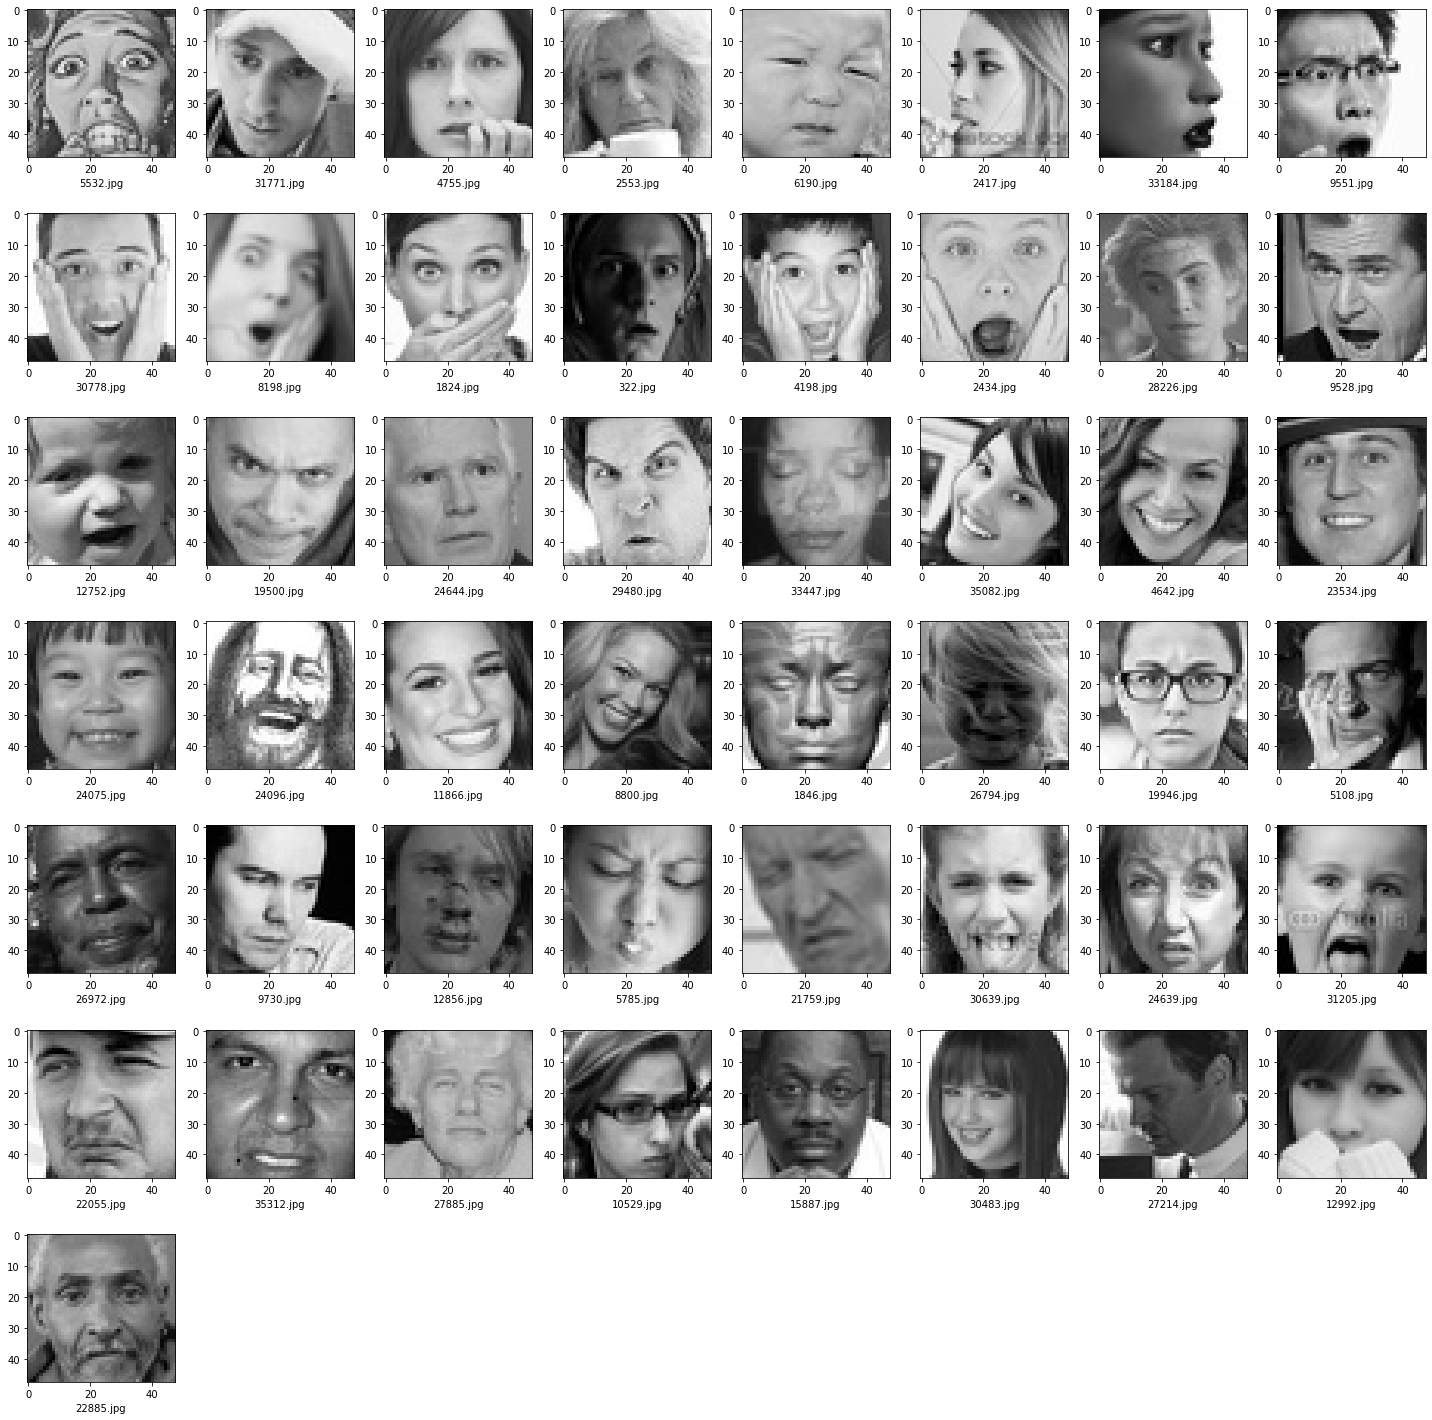

# Install libraries, packages and dataset

In [ ]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install timm
!pip install --upgrade opencv-contrib-python

Cloning into 'Facial-Expression-Dataset'...
remote: Enumerating objects: 34052, done.
remote: Total 34052 (delta 0), reused 0 (delta 0), pack-reused 34052 (from 1)
Receiving objects: 100% (34052/34052), 52.31 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35887/35887), done.
  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-ke2ns2_x
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-ke2ns2_x
  Resolved https://github.com/albumentations-team/albumentations to commit 2e1bbec7895ead9be76351c17666b0b537530dc9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.5/680.5 kB 18.2 MB/s eta 0:00:00
  Created wheel for albumentations: filename

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
#!git clone https://github.com/gasvn/Res2Net.git

#from Res2net import res2net50
#model = res2net50(pretrained=True)


# Configurations

In [ ]:
TRAIN_IMG_FOLDER_PATH='/content/Facial-Expression-Dataset/train/'
VAL_IMG_FOLDER_PATH='/content/Facial-Expression-Dataset/train/'

LR=0.001
BATCH_SIZE=32
EPOCHS=30

DEVICE='cuda'
MODEL_NAME='resnet50'

# Load Dataset

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [ ]:
from math import degrees
train_args=T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.RandomRotation(degrees=(-20,20)),
    T.ToTensor()
])
valid_args=T.Compose([
    T.ToTensor()
])

In [ ]:
trainset=ImageFolder(TRAIN_IMG_FOLDER_PATH,transform=train_args)
validset=ImageFolder(VAL_IMG_FOLDER_PATH,transform=valid_args)

In [ ]:
print(f"Total no. of examples in trainset : {len(trainset)}")
print(f"Total no. of examples in validset : {len(validset)}")

Total no. of examples in trainset : 28821
Total no. of examples in validset : 28821


In [ ]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


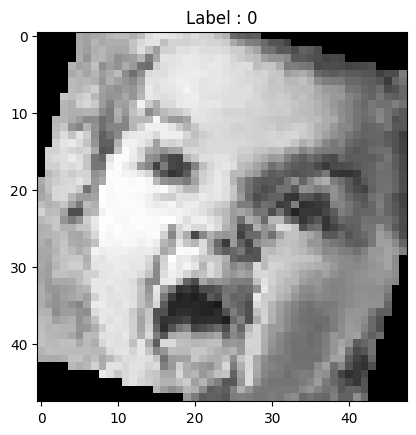

In [ ]:
image,label=trainset[100]
plt.imshow(image.permute(1,2,0))
plt.title(f"Label : {label}")
plt.show()

# Load Dataset into Batches

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
trainloader=DataLoader(trainset,batch_size=BATCH_SIZE,shuffle=True)
validloader=DataLoader(validset,batch_size=BATCH_SIZE)

In [ ]:
print(f"Total no. of batches in trainloader : {len(trainloader)}")
print(f"Total no. of batches in validloader : {len(validloader)}")

Total no. of batches in trainloader : 901
Total no. of batches in validloader : 901


In [ ]:
for images,labels in trainloader:
    break

print(f"One image batch shape : {images.shape}")
print(f"One label batch shape : {labels.shape}")

One image batch shape : torch.Size([32, 3, 48, 48])
One label batch shape : torch.Size([32])


# Create Model

In [ ]:
import timm
from torch import nn

In [ ]:
class FaceModel(nn.Module):
  def __init__(self):
    super(FaceModel,self).__init__()
    self.model=timm.create_model(MODEL_NAME,pretrained=True,num_classes=7)
  def forward(self,images,labels=None):
    logits=self.model(images)

    if labels != None:
      loss=nn.CrossEntropyLoss()(logits,labels)
      return logits,loss

    return logits


In [ ]:
model=FaceModel()
model.to(DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

FaceModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, mome

# Create Train and Eval Function

In [ ]:
from tqdm import tqdm

In [ ]:
def multiclass_accuracy(y_pred,y_true):
    top_p,top_class = y_pred.topk(1,dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [ ]:
def train_fn(model,dataloader,optimizer,current_epo):
  model.train()
  total_loss=0.0
  total_acc=0.0
  tk=tqdm(dataloader,desc="EPOCH"+"[TRAIN]"+str(current_epo+1)+"/"+ str(EPOCHS))

  for t,data in enumerate(tk):
    images,labels=data
    images=images.to(DEVICE)
    labels=labels.to(DEVICE)

    optimizer.zero_grad()
    logits,loss=model(images,labels)
    loss.backward()
    optimizer.step()


    acc=multiclass_accuracy(logits,labels)
    total_loss+=loss.item()
    total_acc+=acc.item()

    tk.set_postfix({'loss' : total_loss/(t+1),'acc' : total_acc/(t+1)})
  return total_loss/len(dataloader),total_acc/len(dataloader)

In [ ]:
def eval_fn(model,dataloader,current_epo):
  model.eval()
  total_loss=0.0
  total_acc=0.0
  tk=tqdm(dataloader,desc="EPOCH"+"[eval]"+str(current_epo+1)+"/"+ str(EPOCHS))

  for t,data in enumerate(tk):
    images,labels=data
    images=images.to(DEVICE)
    labels=labels.to(DEVICE)

    logits,loss=model(images,labels)

    acc=multiclass_accuracy(logits,labels)
    total_loss+=loss.item()
    total_acc+=acc.item()

    tk.set_postfix({'loss' : total_loss/(t+1),'acc' : total_acc/(t+1)})
  return total_loss/len(dataloader),total_acc/len(dataloader)

# Create Training Loop

In [ ]:
optimizer=torch.optim.Adam(model.parameters(),lr=LR)

In [ ]:
best_valid_loss=np.Inf

for i in range(EPOCHS):
  train_loss,train_acc=train_fn(model,trainloader,optimizer,i)
  valid_loss,valid_acc=eval_fn(model,validloader,i)

  if valid_loss < best_valid_loss:
    torch.save(model.state_dict(),'b4-best-weight.pt')
    print("SAVED_BEST_WEIGHTS")
    best_valid_loss=valid_loss

EPOCH[eval]1/30: 100%|██████████| 901/901 [00:25<00:00, 34.87it/s, loss=1.23, acc=0.543]


SAVED_BEST_WEIGHTS


EPOCH[eval]2/30: 100%|██████████| 901/901 [00:25<00:00, 35.81it/s, loss=1.04, acc=0.605]


SAVED_BEST_WEIGHTS


EPOCH[eval]3/30: 100%|██████████| 901/901 [00:24<00:00, 36.15it/s, loss=0.977, acc=0.629]


SAVED_BEST_WEIGHTS


EPOCH[eval]4/30: 100%|██████████| 901/901 [00:24<00:00, 36.37it/s, loss=0.911, acc=0.657]


SAVED_BEST_WEIGHTS


EPOCH[eval]6/30: 100%|██████████| 901/901 [00:24<00:00, 36.62it/s, loss=0.838, acc=0.684]


SAVED_BEST_WEIGHTS


EPOCH[eval]7/30: 100%|██████████| 901/901 [00:24<00:00, 36.04it/s, loss=0.801, acc=0.696]


SAVED_BEST_WEIGHTS


EPOCH[eval]8/30: 100%|██████████| 901/901 [00:24<00:00, 36.40it/s, loss=0.749, acc=0.718]


SAVED_BEST_WEIGHTS


EPOCH[eval]9/30: 100%|██████████| 901/901 [00:24<00:00, 36.73it/s, loss=0.737, acc=0.727]


SAVED_BEST_WEIGHTS


EPOCH[eval]10/30: 100%|██████████| 901/901 [00:24<00:00, 36.18it/s, loss=0.636, acc=0.764]


SAVED_BEST_WEIGHTS


EPOCH[eval]11/30: 100%|██████████| 901/901 [00:25<00:00, 35.36it/s, loss=0.584, acc=0.784]


SAVED_BEST_WEIGHTS


EPOCH[eval]13/30: 100%|██████████| 901/901 [00:24<00:00, 36.55it/s, loss=0.518, acc=0.81]


SAVED_BEST_WEIGHTS


EPOCH[eval]14/30: 100%|██████████| 901/901 [00:24<00:00, 36.64it/s, loss=0.482, acc=0.824]


SAVED_BEST_WEIGHTS


EPOCH[eval]15/30: 100%|██████████| 901/901 [00:24<00:00, 36.65it/s, loss=0.412, acc=0.85]


SAVED_BEST_WEIGHTS


EPOCH[eval]16/30: 100%|██████████| 901/901 [00:24<00:00, 36.72it/s, loss=0.397, acc=0.856]


SAVED_BEST_WEIGHTS


EPOCH[eval]17/30: 100%|██████████| 901/901 [00:25<00:00, 35.93it/s, loss=0.374, acc=0.867]


SAVED_BEST_WEIGHTS


EPOCH[eval]18/30: 100%|██████████| 901/901 [00:24<00:00, 36.83it/s, loss=0.329, acc=0.883]


SAVED_BEST_WEIGHTS


EPOCH[eval]20/30: 100%|██████████| 901/901 [00:24<00:00, 36.52it/s, loss=0.314, acc=0.888]


SAVED_BEST_WEIGHTS


EPOCH[eval]21/30: 100%|██████████| 901/901 [00:25<00:00, 35.37it/s, loss=0.302, acc=0.892]


SAVED_BEST_WEIGHTS


EPOCH[eval]22/30: 100%|██████████| 901/901 [00:25<00:00, 35.31it/s, loss=0.268, acc=0.907]


SAVED_BEST_WEIGHTS


EPOCH[eval]23/30: 100%|██████████| 901/901 [00:25<00:00, 35.38it/s, loss=0.231, acc=0.918]


SAVED_BEST_WEIGHTS


EPOCH[eval]26/30: 100%|██████████| 901/901 [00:25<00:00, 35.39it/s, loss=0.195, acc=0.933]


SAVED_BEST_WEIGHTS


EPOCH[eval]27/30: 100%|██████████| 901/901 [00:25<00:00, 34.94it/s, loss=0.183, acc=0.937]


SAVED_BEST_WEIGHTS


EPOCH[eval]28/30: 100%|██████████| 901/901 [00:25<00:00, 34.92it/s, loss=0.163, acc=0.947]


SAVED_BEST_WEIGHTS


EPOCH[eval]29/30: 100%|██████████| 901/901 [00:24<00:00, 36.34it/s, loss=0.155, acc=0.948]


SAVED_BEST_WEIGHTS


EPOCH[eval]30/30: 100%|██████████| 901/901 [00:25<00:00, 35.18it/s, loss=0.163, acc=0.942]


15
15


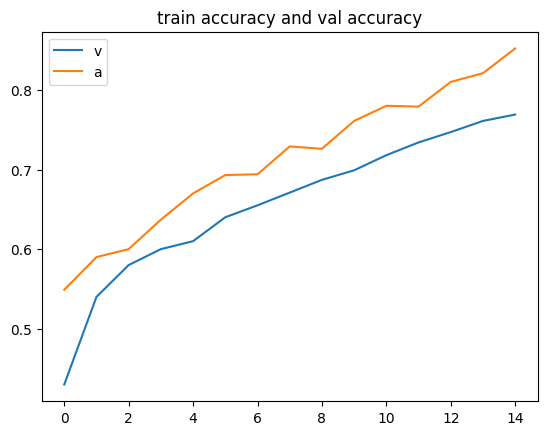

In [ ]:
train_acc=[0.43,0.54,0.58,0.60,0.61,0.64,0.655,0.671,0.687,0.699,0.718,0.734,0.747,0.761,0.769]
val_acc=[0.549,0.59,0.60,0.637,0.67,0.693,0.694,0.729,0.726,0.761,0.78,0.779,0.81,0.821,0.852]
print(len(train_acc))
print(len(val_acc))
plt.plot(train_acc)
plt.plot(val_acc)
plt.title("train accuracy and val accuracy")
plt.legend("train accuracy")
plt.legend("val accuracy")
plt.show()

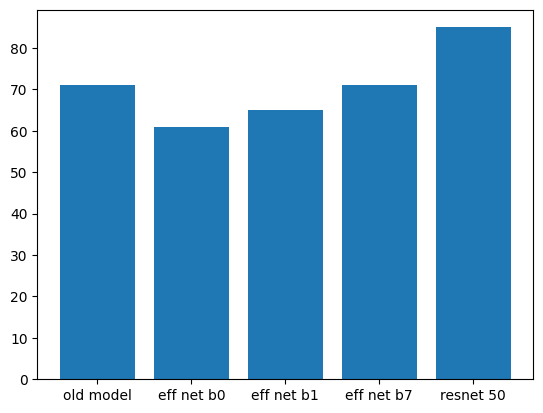

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["old model","eff net b0", "eff net b1", "eff net b7", "resnet 50"])
y = np.array([71, 61, 65, 71,85])

plt.bar(x,y)
plt.show()

In [ ]:
# Evaluate the model using PyTorch
model.eval()
y_true = []
y_pred = []

for images, labels in validloader:
    images = images.to(DEVICE)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

# Convert lists to tensors for calculation
y_true_tensor = torch.tensor(y_true)
y_pred_tensor = torch.tensor(y_pred)

# Calculating precision, recall, and F1 score using PyTorch
TP = ((y_pred_tensor == 1) & (y_true_tensor == 1)).sum().item()
FP = ((y_pred_tensor == 1) & (y_true_tensor == 0)).sum().item()
FN = ((y_pred_tensor == 0) & (y_true_tensor == 1)).sum().item()

precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.9809976247030879
Recall: 0.9880382775119617
F1 Score: 0.9845053635280095


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true, y_pred)
print(cm)

[[3672    8  111   13   83   83   23]
 [   5  413    3    0    0   11    4]
 [  51    2 3753   14   56  149   78]
 [  27    4   30 6992   55   34   22]
 [  38    1   88   83 4629  114   29]
 [  80    3  107   22  137 4568   21]
 [   7    1   55   15    3    2 3122]]


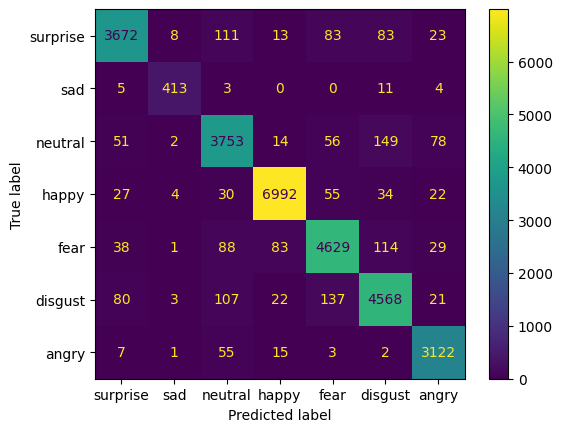

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'][::-1] )
cm_display.plot()
plt.show()

In [ ]:
#model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load('/content/b4-best-weight.pt'))
model.eval()

<ipython-input-29-7603f5cd6da3>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/b4-best-weight.pt'))


FaceModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, mome

In [ ]:
# Evaluate the model using PyTorch
model.eval()
y_true = []
y_pred = []

for images, labels in validloader:
    images = images.to(DEVICE)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

# Convert lists to tensors for calculation
y_true_tensor = torch.tensor(y_true)
y_pred_tensor = torch.tensor(y_pred)

# Calculating precision, recall, and F1 score using PyTorch
TP = ((y_pred_tensor == 1) & (y_true_tensor == 1)).sum().item()
FP = ((y_pred_tensor == 1) & (y_true_tensor == 0)).sum().item()
FN = ((y_pred_tensor == 0) & (y_true_tensor == 1)).sum().item()

precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.9857482185273159
Recall: 0.9834123222748815
F1 Score: 0.9845788849347569


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true, y_pred)
print(cm)

[[3749    6   38   24   77   85   14]
 [   7  415    1    1    1    8    3]
 [  90    8 3639   16  111  186   53]
 [  12    0   11 7046   56   14   25]
 [  31    0   29   48 4783   87    4]
 [  80    3   72   26  145 4608    4]
 [   7    2   81   14    9    5 3087]]


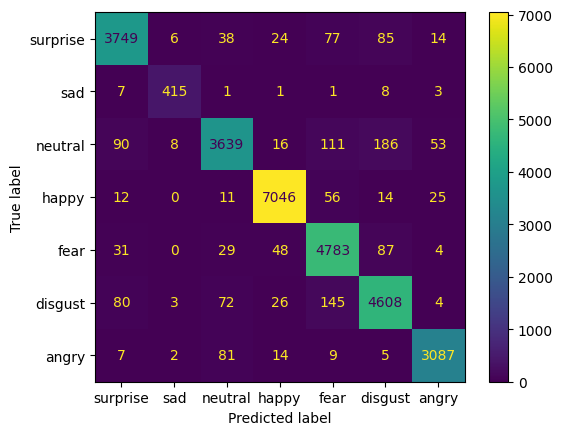

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'][::-1] )
cm_display.plot()
plt.show()

In [ ]:
import pandas as pd

data = {
  "resnet": [0.96,0.94,0.95,0.75],
  "old model":[0.83,0.84,0.85,0.73],
  "eff b0":[0.92,0.91,0.85,0.65],
  "eff b4":[0.86,0.89,0.83,0.63],
  "eff b7":[0.84,0.81,0.85,0.69]
}

df = pd.DataFrame(data, index = ["Precision", "Recall", "F1-score","accuracy"])

print(df)

           resnet  old model  eff b0  eff b4  eff b7
Precision    0.96       0.83    0.92    0.86    0.84
Recall       0.94       0.84    0.91    0.89    0.81
F1-score     0.95       0.85    0.85    0.83    0.85
accuracy     0.75       0.73    0.65    0.63    0.69


In [ ]:
model = FaceModel()
model.load_state_dict(torch.load('/content/b4-best-weight.pt', weights_only=True))
model.eval()

FaceModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, mome

# Inference

In [ ]:
def view_classify(img, ps):

    classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    ps = ps.data.cpu().numpy().squeeze()
    img = img.numpy().transpose(1,2,0)

    fig, (ax1, ax2) = plt.subplots(figsize=(5,9), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax2.barh(classes, ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(classes)
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

    return None